# 16 Python Pandas. Описовий аналіз даних. Візуалізація - Частина 2

## Минулого разу
- Працюємо з pandas
- Основні поняття описового аналізу даних. Описова статистика.
- Описовий аналіз у візуалізації

## План заняття
- Продовжимо знайомитись з описовими статистика і візуалізаціями
- Міри звязку між атрибутами

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

#online_shoppers_intention.csv
data = pd.read_csv('car_price_dataset.csv')
data.head(5)

Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi      Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen    Golf  2003          2.6    Hybrid  Semi-Automatic   286618   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4            2  11171  
3      2            1  11780  
4      3            3   2867

**Attribute Descriptions**

- **Brand**: Specifies the brand of the car (e.g., Toyota, BMW, Ford).
- **Model**: Specifies the model of the car (e.g., Corolla, Focus, X5).
- **Year**: The production year of the car. Newer years typically indicate higher prices.
- **Engine_Size**: Specifies the engine size in liters (L). Larger engines generally correlate with higher prices.
- **Fuel_Type**: indicates the type of fuel used by the car:
    - Petrol: Cars running on gasoline.
    - Diesel: Cars running on diesel fuel.
    - Hybrid: Cars that use both fuel and electricity.
    - Electric: Fully electric cars.
- **Transmission**: The type of transmission in the car:
    - Manual: Manual transmission.
    - Automatic: Automatic transmission.
    - Semi-Automatic: Semi-automatic transmission.-
- **Mileage**: The total distance the car has traveled, measured in kilometers. Lower mileage generally indicates a higher price.
- **Doors**: The number of doors in the car. Commonly 2, 3, 4, or 5 doors.
- **Owner_Count**: The number of previous owners of the car.
- **Price**: The estimated selling price of the car. It is calculated based on several factors such as production year, engine size, mileage, fuel type, and transmission.

In [2]:
data.shape

(10000, 10)

In [3]:
data.describe(include = 'all').T

count unique       top  freq         mean           std  \
Brand           10000     10      Ford  1048          NaN           NaN   
Model           10000     30    Accord   365          NaN           NaN   
Year          10000.0    NaN       NaN   NaN    2011.5437      6.897699   
Engine_Size   10000.0    NaN       NaN   NaN      3.00056      1.149324   
Fuel_Type       10000      4  Electric  2625          NaN           NaN   
Transmission    10000      3    Manual  3372          NaN           NaN   
Mileage       10000.0    NaN       NaN   NaN  149239.1118  86322.348957   
Doors         10000.0    NaN       NaN   NaN       3.4971      1.110097   
Owner_Count   10000.0    NaN       NaN   NaN       2.9911      1.422682   
Price         10000.0    NaN       NaN   NaN    8852.9644    3112.59681   

                 min       25%       50%       75%       max  
Brand            NaN       NaN       NaN       NaN       NaN  
Model            NaN       NaN       NaN       NaN       NaN  
Year          2000.0    2006.0    2012.0    2017.0    2023.0  
Engine_Size      1.0       2.0       3.0       4.0       5.0  
Fuel_Type        NaN       NaN       NaN       NaN       NaN  
Transmission     NaN       NaN       NaN       NaN       NaN  
Mileage         25.0  74649.25  149587.0  223577.5  299947.0  
Doors            2.0       3.0       3.0       4.0       5.0  
Owner_Count      1.0       2.0       3.0       4.0       5.0  
Price         2000.0    6646.0    8858.5   11086.5   18301.0

## Основні поняття описового аналізу

### Популяція та вибірка (семпл)

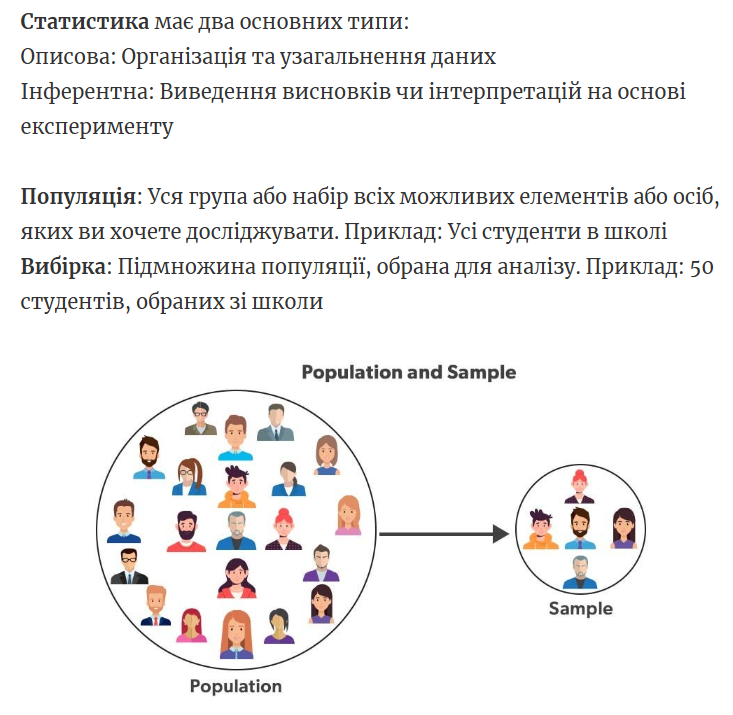

### Типи змінних

- **Номінативна** (якісна) змінна. Змінна, кожне значення якої свідчить про належність об'єкта до групи (категорії). Номінативна змінна поділяє всі об'єкти на які не перетинаються за певною ознакою (стаття, клас і т. д.)
- **Рангові** змінні – це змінні, які можуть бути впорядковані, але не мають фіксованого інтервалу між значеннями. Іншими словами, ви можете сказати, що один об'єкт вище або нижче за інший, але ви не можете сказати, наскільки він вище або нижче.
- **Метричні** (кількісні змінні) – це змінні, які мають кількісне значення, яке можна виміряти. Вони можуть бути дискретними чи безперервними. Вони можуть набувати будь-яких значень на деякому проміжку, наприклад, зростання людини може набувати значень від 160 до 190 см. Кількісні змінні діляться на два підтипи:
- **Безперервні** змінні можуть набувати будь-які значення на деякому проміжку, наприклад, зростання людини, вага людини, температура повітря (зростання людини; вага людини; температура повітря).
- **Дискретні** змінні можуть набувати лише певних значень, наприклад, кількість дітей у сім'ї, кількість кімнат у квартирі, кількість балів, набраних на іспиті (кількість дітей у сім'ї; кількість балів, набраних на іспиті; кількість одиниць товару, проданих за день).


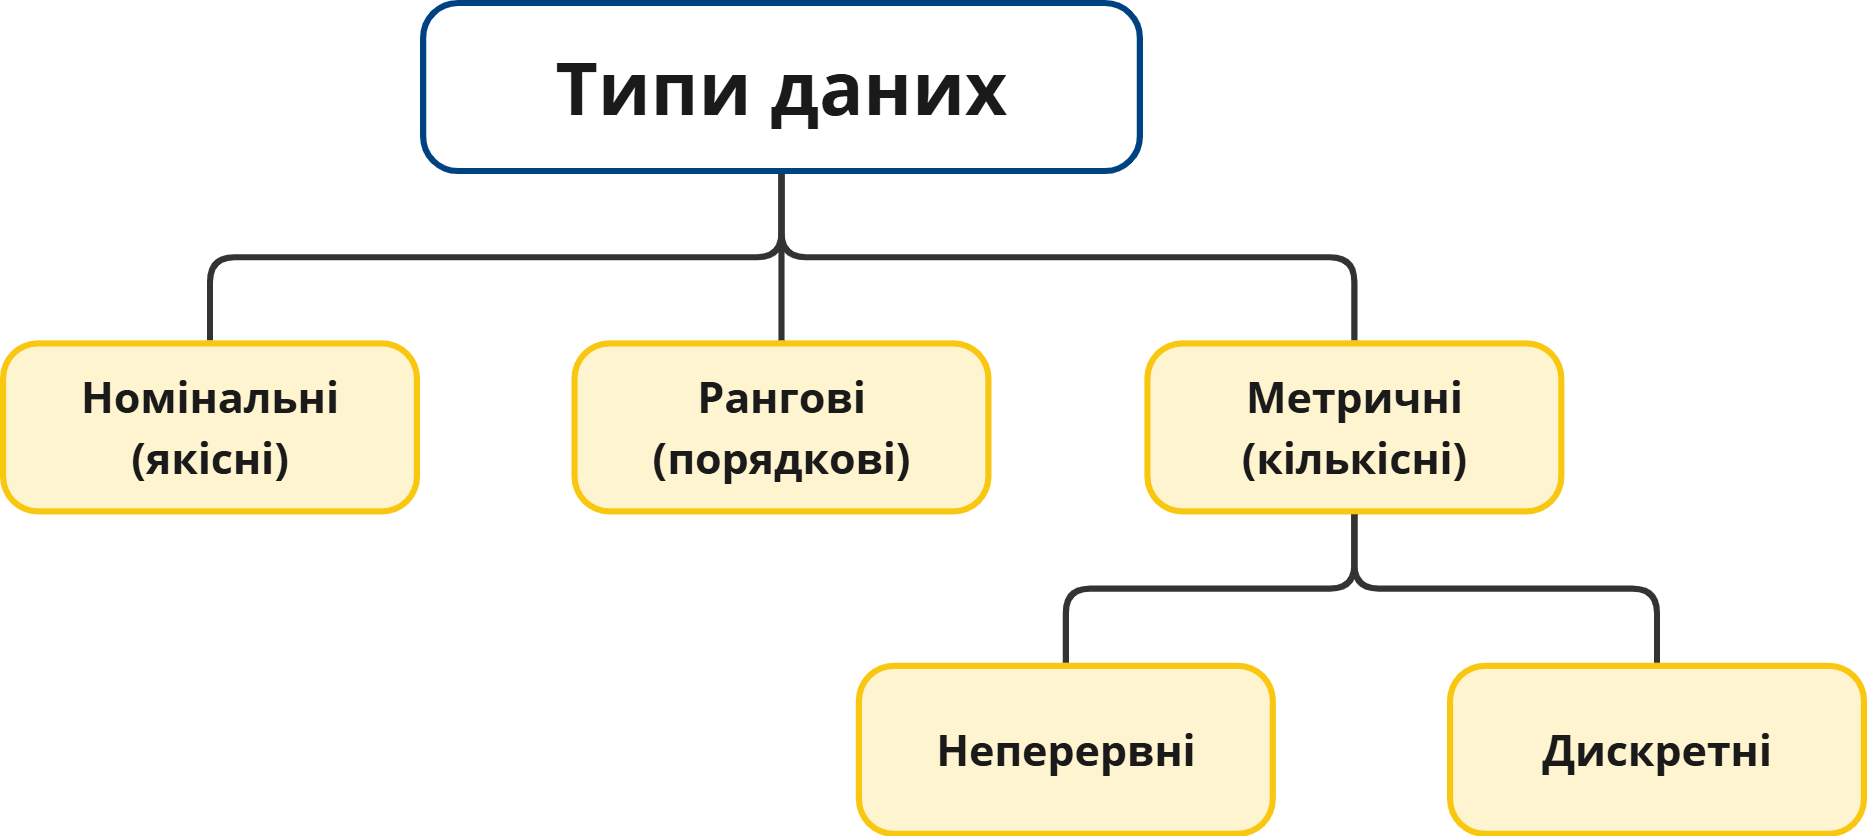

**Описовий аналіз** - загальна назва статистичних процедур, метою яких є отримання узагальненої інформації щодо даних, їх систематизація, наочне подання і т.д.

#### Міри центральної тенденції

Базовими показниками описової статистики вибірки або генеральної сукупності є **міри центральної тенденції**

- **Середнє арифментичне** - оцінка математичного сподівання генеральної сукупності. На величину можуть сильно впливати викиди.

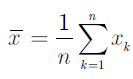

- **Медіана** - значення впорядкованої за зростання вибірки, яке ділить її на дві рівні за кількість спостережень частики.

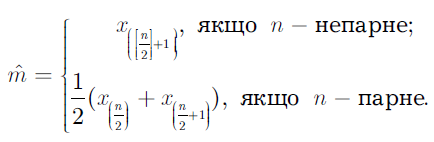

- **Мода** - значення, що найчастіше зустрічається у вибірці спостережень. Важливо памятати, що на моду НЕ ВПЛИВАЮТЬ екстремальні значення в розподілі, але впливають екстремальні частоти.

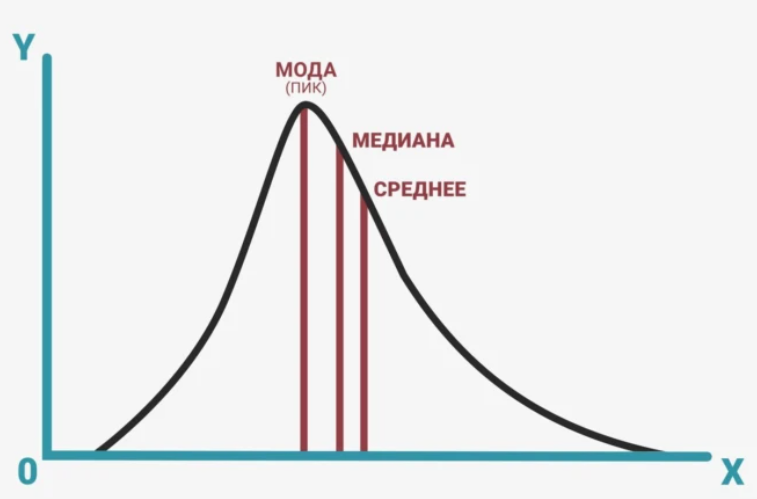

**ВАЖЛИВО ПАМЯТАТИ**: значення в аналізованих даних, які різко відрізняються від основної кількості даних називаються **викидами**.
Для боротьби з викидами можна або прибрати їх, або спробувати замінити на якісь інші значення, або застосувати методи, де викиди не є впливовими.

In [4]:
#distr.skew()
data

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356      2            3  12092  
2      231440      4            2  11171  
3      160971      2            1  11780  
4      286618      3            3   2867  
...       ...    ...          ...    ...  
9995     5794      2            4   8884  
9996   168000      2            1   6240  
9997    86664      5            1   9866  
9998   225772      4            1   4084  
9999   157882      3            3   3342  

[10000 rows x 10 columns]

In [ ]:
data.agg(
    {
       'Mileage':  [pd.Series.mean, pd.Series.median],
       'Price':  [pd.Series.mean, pd.Series.median],
    }
)

In [5]:
#mean median
action = [pd.Series.mean, pd.Series.median]
agg_dict = {}
variables = ['Mileage', 'Price']

#generating aggregation function for attribute
for col in variables:
    agg_dict[col] = action

data\
.groupby(['Transmission'])\
.agg(agg_dict)\
.style\
.background_gradient(axis = 0)

In [8]:
#mean median
action = [pd.Series.mean, pd.Series.median]
agg_dict = {}
variables = ['Mileage']

#generating aggregation function for attribute
for col in variables:
    agg_dict[col] = action

data\
.groupby(['Year'])\
.agg(agg_dict)\
.style\
.background_gradient(axis = 0)

In [9]:
#mean median
action = [pd.Series.mean, pd.Series.median]
agg_dict = {}
variables = ['Price']

#generating aggregation function for attribute
for col in variables:
    agg_dict[col] = action

data\
.groupby(['Year'])\
.agg(agg_dict)\
.style\
.background_gradient(axis = 0)

#### Міри варіабельності

Показують наскільки згруповані/розсіяні значення даних відносно середнього.

- **Розмах** - найпростіша міра розкиду, що визначається як різниця між максимальним та мінімальним значеннями у вибірці. Дозволяє виявити аномально великі або аномально малі значення.

- **Дисперсія** - міра відхилення значень випадкової величини від центру розподілу.

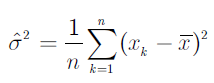

Дисперсія **ще більше чутлива** до викидів ніж середнє

- **Стандартне або середньоквадратичне відхилення** - корінь квадратний із дисперсії. Чим менші дисперсія і СКВ, тим менше розкид значень вибірки відносно середнього, тим більше ми можемо довіряти показникам, оскільки вони більш точно будуть описувати генеральну сукупність або вибірку.

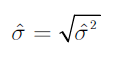

- **Коефіцієнт варіації** - статистичний оцінний показник, що характеризує співвідношення середньоквадратичного відхилення та середньої величини значення аналізованого показника. Дозволяє порівняти мінливість ознак (тобто наскільки багато унікальних значень містить у вибірці).

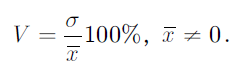

В статистиці прийнято (але не є обовязковим) наступне ранжування:
- Якщо КВ менше 10%, то вважається що степінь розсіюванння незначна
- Якщо від 10% до 20% — середня;
- Якщо більше 20% - велика

Якщо значення коефіцієнта не більше 33%, то набір даних важається однорідним, в іншому випадку - неоднорідним.

- **Емпіричний квантиль** рівня 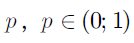 - таке значення, що принаймні 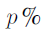 елементів вибірки набувають це або менше значення, та, приймні 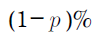 елементів набувають це або більше значення.

Квантилі рівнів 0.25, 0.5, 0.75 називають **квартилями**. Квантиль 50 характеризує положення значень всередині розподілу.

- **Міжквартальний розмаї** (або IQR) - різниця між верхнім та нижнім квартилями:

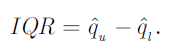

Міжквартильній розмах більш стійкий до викидів ніж звичайний розмах.

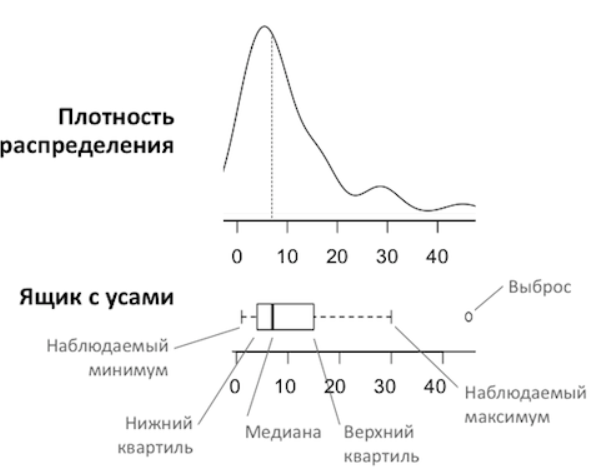 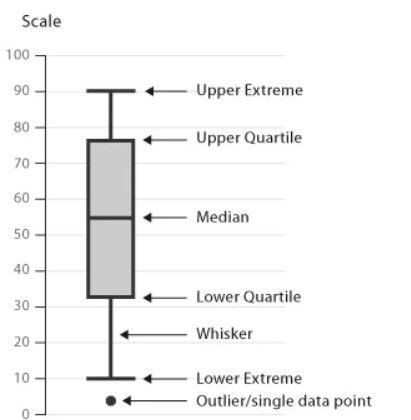

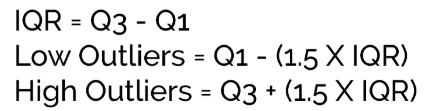

[Почитати про боксплот](https://medium.com/analytics-vidhya/the-box-plot-a-simple-but-informative-visualization-cacc20d9ff25)

In [ ]:
data

In [10]:
def _get_stats(data, grouper, variables):
    #metrics to get
    action = [
        pd.Series.min,
        pd.Series.max,
        pd.Series.mean,
        pd.Series.var,
        pd.Series.std
    ]
    agg_dict = {}

    #generating aggregation function for attribute
    for col in variables:
        agg_dict[col] = action

    tt = data\
    .groupby([grouper])\
    .agg(agg_dict)\
    .reset_index(inplace = False)

    tt.columns = tt.columns.map('_'.join).str.strip('')
    tt = tt.rename(columns = {f'{grouper}_': grouper})

    for col in variables:
        tt[f'{col}_R'] = tt[f'{col}_max'] - tt[f'{col}_min']
        tt[f'{col}_CoefVar'] = tt[f'{col}_std'] / tt[f'{col}_mean']
    display(tt.set_index(grouper).style.background_gradient(axis = 0))

_get_stats(data, 'Fuel_Type', ['Mileage'])

In [11]:
_get_stats(data, 'Fuel_Type', ['Price'])

In [12]:
_get_stats(data, 'Transmission', ['Mileage'])
_get_stats(data, 'Transmission', ['Price'])

_get_stats(data, 'Brand', ['Mileage'])
_get_stats(data, 'Brand', ['Price'])

In [14]:
def _get_quantiles(data, grouper, variable, percentiles = [.25, .50, .75]):
    display(
        data\
        .groupby(grouper)[variable].describe(percentiles = percentiles)\
        .T\
        .style\
        .format('{:,.2f}')
        .background_gradient(axis = 1)
    )

_get_quantiles(data, 'Brand', 'Price', percentiles = [.1, .25, .4, .5, .6, .75, .8, .9, .95])

In [15]:
_get_quantiles(data, 'Transmission', 'Price', percentiles = [.1, .25, .4, .5, .6, .75, .8, .9, .95])

**Асиметрією** називається усунення розподілу щодо її моди.

- **Негативна** асиметрія, або ліве усунення кривої, вказує на те, що площа під графіком більша на лівій стороні моди.
- **Позитивна** асиметрія, або праве усунення кривої, вказує на те, що площа під графіком більша на правій стороні моди.

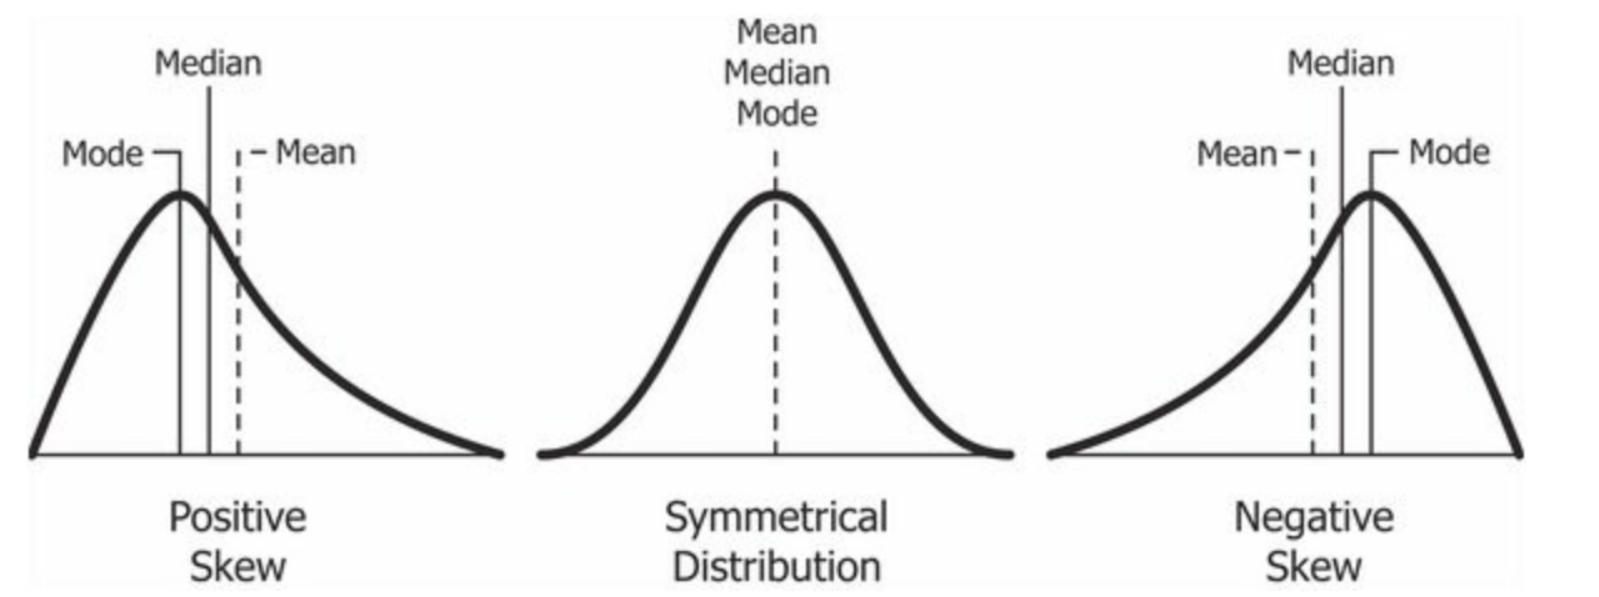

- **Коефіцієнт асиметрії** - величина, що характеризує змішення у розсіюванні даних.

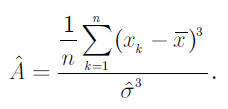

Нормальний розподіл є симетричним, тому його коефіцієнт буде рівний нулю.

In [16]:
def _get_stats(data, grouper, variables):
    #metrics to get
    action = [
        pd.Series.min,
        pd.Series.max,
        pd.Series.mean,
        pd.Series.var,
        pd.Series.std,
        pd.Series.skew
    ]
    agg_dict = {}

    #generating aggregation function for attribute
    for col in variables:
        agg_dict[col] = action

    tt = data\
    .groupby([grouper])\
    .agg(agg_dict)\
    .reset_index(inplace = False)

    tt.columns = tt.columns.map('_'.join).str.strip('')
    tt = tt.rename(columns = {f'{grouper}_': grouper})

    for col in variables:
        tt[f'{col}_R'] = tt[f'{col}_max'] - tt[f'{col}_min']
        tt[f'{col}_CoefVar'] = tt[f'{col}_std'] / tt[f'{col}_mean']
    display(tt.set_index(grouper).style.background_gradient(axis = 0))

_get_stats(data, 'Transmission', ['Price'])

## Описовий аналіз у візуалізацї

Бібліотеки:

- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)
- [plotly](https://plotly.com/python/getting-started/)

Способи графічного подання числових дискретних та неперервних даних:

- **Полігон** - графічне зображення статистичного ряду у вигляді ламаної, що послідовно зєднує точки, координатами яких по осі абсцис є різні можливі значення ознаки, а по осі ординат - частоти або відносні частоти.
- **Гістограма** - діаграма у вигляді стовпців по осі абсцис якої відобжраюаться всі можливі значення змінної, а по ординатам - частоти.
- **Кумулятивна крива** - графік на якому по осі абсцис позначені всі різні значення ознаки, а по осі ординат - відповідні їм накопичені частоти / відносні частоти

Обидва графіка дозволяють оцінити розподіл частот значень змінної, виявити найчастіші або найрідші і т.д.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import plotly as pltl

In [18]:
data

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356      2            3  12092  
2      231440      4            2  11171  
3      160971      2            1  11780  
4      286618      3            3   2867  
...       ...    ...          ...    ...  
9995     5794      2            4   8884  
9996   168000      2            1   6240  
9997    86664      5            1   9866  
9998   225772      4            1   4084  
9999   157882      3            3   3342  

[10000 rows x 10 columns]

In [19]:
grouper = 'Engine_Size'

act = data[grouper].value_counts().reset_index(inplace = False)
act['proportion'] = act['count'] / data.shape[0]
act = act.sort_values(by = grouper)
act['cumulative_share'] = act['proportion'].cumsum()

#rel = data['Year'].value_counts(normalize = True).reset_index(inplace = False)
#act = act.merge(rel, how = 'left', on = ['Year'])

act

Engine_Size  count  proportion  cumulative_share
39          1.0    113      0.0113            0.0113
37          1.1    230      0.0230            0.0343
21          1.2    251      0.0251            0.0594
8           1.3    261      0.0261            0.0855
11          1.4    259      0.0259            0.1114
4           1.5    265      0.0265            0.1379
12          1.6    258      0.0258            0.1637
27          1.7    246      0.0246            0.1883
24          1.8    249      0.0249            0.2132
35          1.9    232      0.0232            0.2364
13          2.0    258      0.0258            0.2622
33          2.1    234      0.0234            0.2856
9           2.2    259      0.0259            0.3115
38          2.3    223      0.0223            0.3338
30          2.4    240      0.0240            0.3578
3           2.5    266      0.0266            0.3844
10          2.6    259      0.0259            0.4103
22          2.7    250      0.0250            0.4353
7           2.8    262      0.0262            0.4615
18          2.9    253      0.0253            0.4868
32          3.0    236      0.0236            0.5104
16          3.1    254      0.0254            0.5358
25          3.2    249      0.0249            0.5607
17          3.3    254      0.0254            0.5861
28          3.4    243      0.0243            0.6104
15          3.5    256      0.0256            0.6360
2           3.6    267      0.0267            0.6627
0           3.7    273      0.0273            0.6900
20          3.8    253      0.0253            0.7153
31          3.9    236      0.0236            0.7389
5           4.0    263      0.0263            0.7652
14          4.1    257      0.0257            0.7909
34          4.2    232      0.0232            0.8141
29          4.3    242      0.0242            0.8383
1           4.4    271      0.0271            0.8654
23          4.5    250      0.0250            0.8904
6           4.6    262      0.0262            0.9166
19          4.7    253      0.0253            0.9419
36          4.8    231      0.0231            0.9650
26          4.9    247      0.0247            0.9897
40          5.0    103      0.0103            1.0000

In [20]:
#polygon
fig  = px.area(
    data_frame = act,
    x = grouper,
    y= "count",
    markers = True,
    title = 'Polygon Chart'
)\
.update_layout(
    width = 800,
    height = 500,
    template = 'plotly_white'
)

fig.show()

In [21]:
#polygon
fig  = px.bar(
    data_frame = act,
    x = grouper,
    y= "cumulative_share",
    title = 'Cumulative Bar Chart'
)\
.update_layout(
    width = 800,
    height = 500,
    template = 'plotly_white'
)

fig.show()

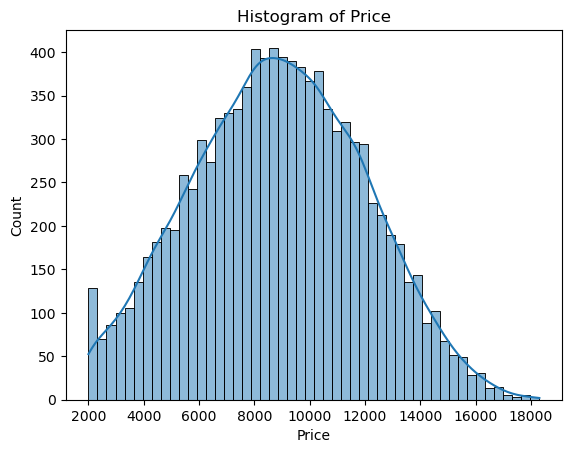

In [22]:
#histogram
var = 'Price'
sns.histplot(data = data, x = var, bins = 50, kde = True)
plt.title(f"Histogram of {var}")
plt.show()

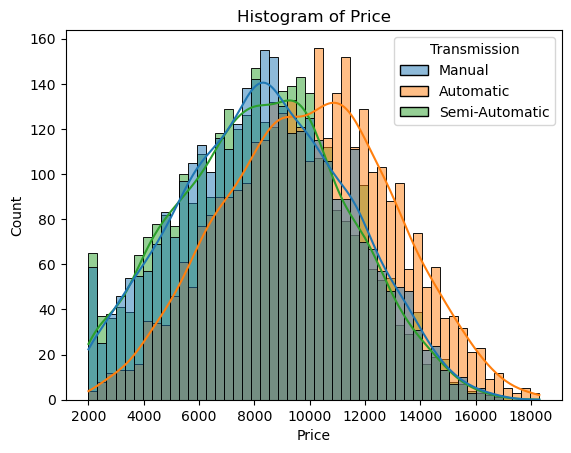

In [23]:
#histogram
var = 'Price'
sns.histplot(data = data, x = var, bins = 50, kde = True, hue = 'Transmission')
plt.title(f"Histogram of {var}")
plt.show()

- **Діаграма розмаху**, або **коробковий графік** або **ящик з вусами** - спосіб візуалізації числових данних поквартильно, а також гранічних значень, що дає уявленя про те як виглядає розподіл.

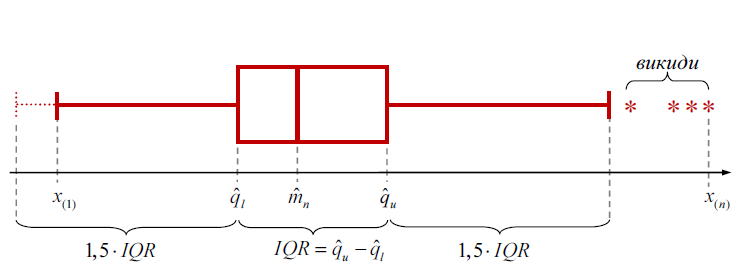

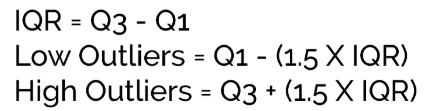

In [24]:
## boxplot only
#px.box()

## histogram + boxplot plotly

boxes = px.histogram(
    data_frame = data,
    x = 'Price',
    color = 'Transmission',
    #color_discrete_map = ,
    marginal = 'box',
    barmode = 'overlay',
    title = ''
)\
.update_layout(
    template = 'plotly_white',
    width = 800,
    height = 500
)\
.update_yaxes(matches = None)\
.for_each_annotation(lambda a: a.update(text = a.text.split("=")[1]))

boxes.show() #renderer = 'png'


In [25]:
boxes = px.box(
    data_frame = data,
    x = 'Doors',
    y = 'Price',
    color = 'Transmission',
    #color_discrete_map = ,
    title = ''
)\
.update_layout(
    template = 'plotly_white',
    width = 600,
    height = 500
)\
.update_yaxes(matches = None)\
.for_each_annotation(lambda a: a.update(text = a.text.split("=")[1]))

boxes.show() #renderer = 'png'

- **Діаграма розсіяння** або **точкова діаграма** - точковий графік, що відображує значення двох змінних у вигляді точок на декартовій площин (2d)

In [26]:
#seaborn
"""
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
plt.title("Scatter Plot of Tips by Total Bill")
plt.show()
"""

#plotly
fig = px.scatter(
    data,
    x = "Price",
    y = "Mileage",
    color = 'Year'
)\
.update_layout(
    width = 800,
    height = 600,
    template = 'plotly_white'
)

fig.show()
    


In [ ]:
data

**Ще** деякі види діаграм:
- Violin plot: Combines a box plot with a density plot, showing the distribution of the data across different categories
- Heatmap: Visualizes data through a color-coding scheme, often used for correlation matrices.
- Pairplot: Displays pairwise relationships in a dataset, useful for exploratory data analysis.

[pd.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

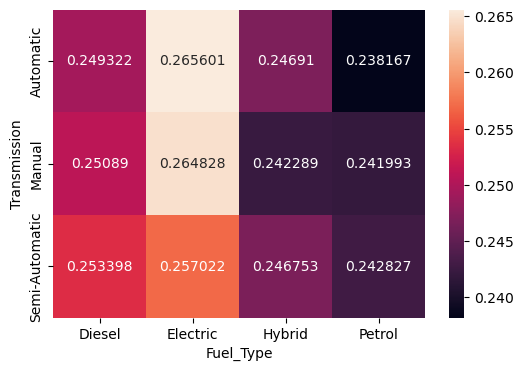

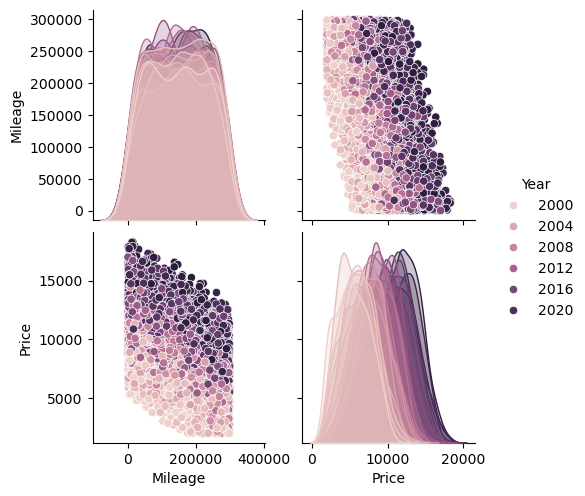

In [33]:
#violin plot
#sns.violinplot(data = , x = , y = , inner = )

#heatmap
fig, ax = plt.subplots(figsize = (6, 4))
sns.heatmap(
    data = pd.crosstab(data['Transmission'], data['Fuel_Type'], dropna = False, normalize = 'index'),
    annot = True,
    ax = ax,
    fmt = 'g'
    #cmap = "YlGnBu"
)

#pair plot
sns.pairplot(data = data[['Mileage', 'Price', 'Year']], hue = 'Year')
#plt.title("Pair Plot of Tips Dataset")
#plt.show()

In [30]:
tt = data.groupby(['Transmission'])['Fuel_Type'].value_counts().reset_index()
tt.pivot_table(
    index = 'Transmission',
    columns = 'Fuel_Type',
    values = 'count'
)

Fuel_Type       Diesel  Electric  Hybrid  Petrol
Transmission                                    
Automatic        827.0     881.0   819.0   790.0
Manual           846.0     893.0   817.0   816.0
Semi-Automatic   839.0     851.0   817.0   804.0

In [27]:
pd.crosstab(data['Transmission'], data['Fuel_Type'])

Fuel_Type       Diesel  Electric  Hybrid  Petrol
Transmission                                    
Automatic          827       881     819     790
Manual             846       893     817     816
Semi-Automatic     839       851     817     804

- **Діаграма Паретто** - гістограма, що зображує частоти, появи ознак, упорядковані у порядку спадання, на які накладається точково-лінійний графіку накопичених частот. Дозволяє зрозуміти, які фактори є суттєвими (мають більшу долю даних), а які ні.

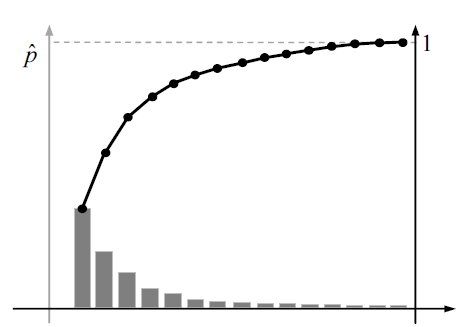

In [34]:
def _get_paretto_dia(data, grouper, width = 15, heigth = 10):
    act = data[grouper].value_counts().reset_index(inplace = False)
    act['proportion'] = act['count'] / data.shape[0]
    act['cumulative_share'] = act['proportion'].cumsum()
    act[grouper] = act[grouper].astype(str)

    #plotting paretto diagram with matplotlib
    fig, ax = plt.subplots(figsize = (width, heigth))
    ax.bar(act[grouper], act['count'])
    ax2 = ax.twinx()
    ax2.plot(act[grouper], act['cumulative_share'], color="C1", marker = '.', ms=7)

    ax.tick_params(axis= 'y', colors = 'C0')
    ax2.tick_params(axis = 'y', colors= 'C1')
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_title(f'Paretto Giagram: {grouper} Categories')
    plt.show()

    return act

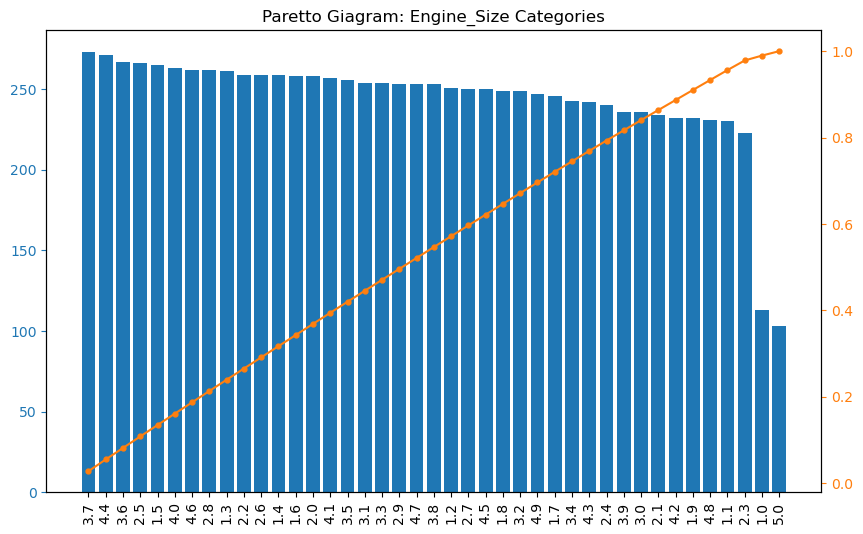

In [35]:
part_data = _get_paretto_dia(data, 'Engine_Size', width = 10, heigth = 6)

**Приклад з реального життя**: 

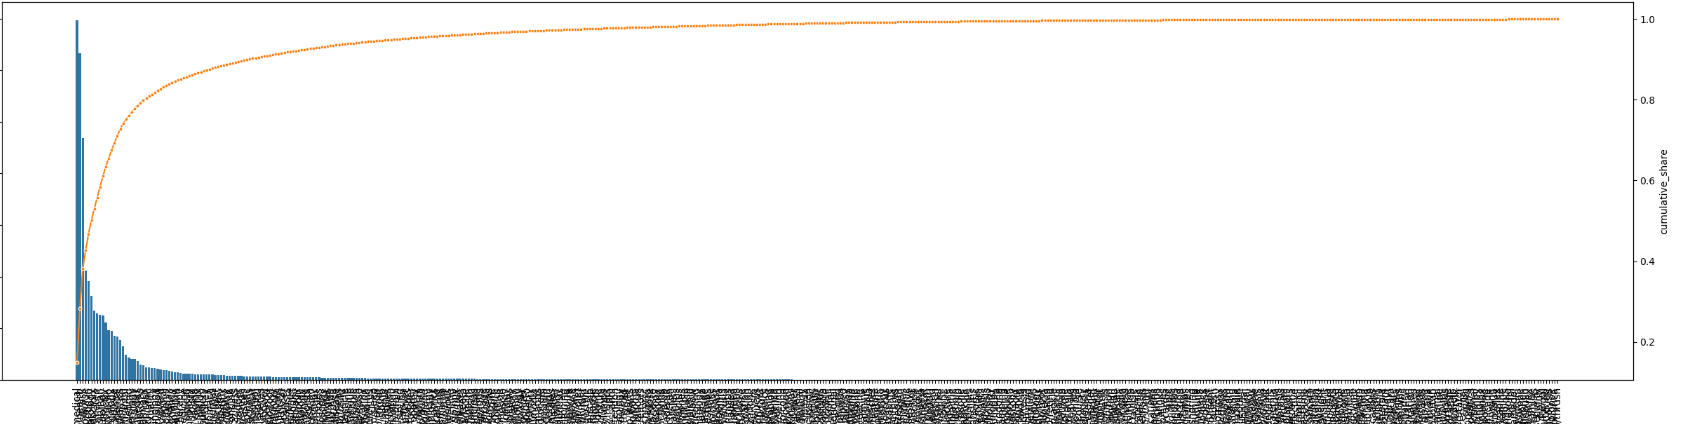



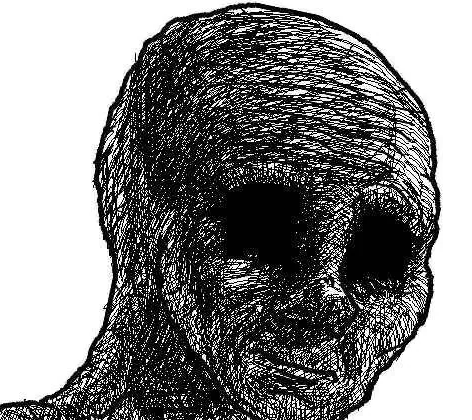



# Міри звязку між атрибутами

У математичному сенсі завдання полягає у знаходженні зв'язку між двома рядами змінними, виміряних в одній і тій же вибірці даних. Про наявність зв'язку між цими змінними можна говорити в тих випадках, коли зміна величини х веде до закономірної зміни величини у, і якщо характер змін є передбачуваним.

**Кореляція** – це статистичний термін, який вказує на залежність між двома змінними. Якщо дві змінні корелюють між собою, це означає, що змінні залежать одна від одної.

Типи кореляції:
- позитивна
- негативна
- нульова.

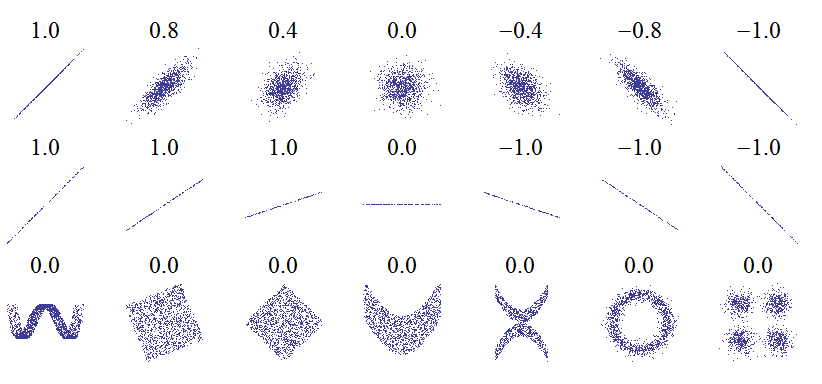

**Кореляційний коефіцієнт** – це числове значення, яке вказує на силу і напрям кореляції між двома змінними. Значення кореляційного коефіцієнта може бути в діапазоні від -1 до 1. Якщо значення кореляційного коефіцієнта близьке до 1, то між змінними існує сильна позитивна кореляція. Якщо значення близьке до -1, то між змінними існує сильна негативна кореляція. Якщо значення близьке до 0, то між змінними немає кореляції.

Розглянемо декілька методів розрахунку залежностей між змінними:
- коефіцієнт кореляції **Фехнера**
- коефіцієнт кореляції **Пірсона**
- коефіцієнт кореляції **Спірмена**
- тест на незалежність **Chi-square**

Ранжування кореляцій:
- 0 - 0.3 - слабка
- 0.3 - 0.6 - середня
- 0.6 + - непогана (сильна)


###  Кореляція Фехнера

Застосовуємо на continuos даних.
Для обчислення коефіцієнта Фехнера необхідно обчислити середні значення кожної ознаки, а також для кожного значення змінної – знак відхилення від середнього.

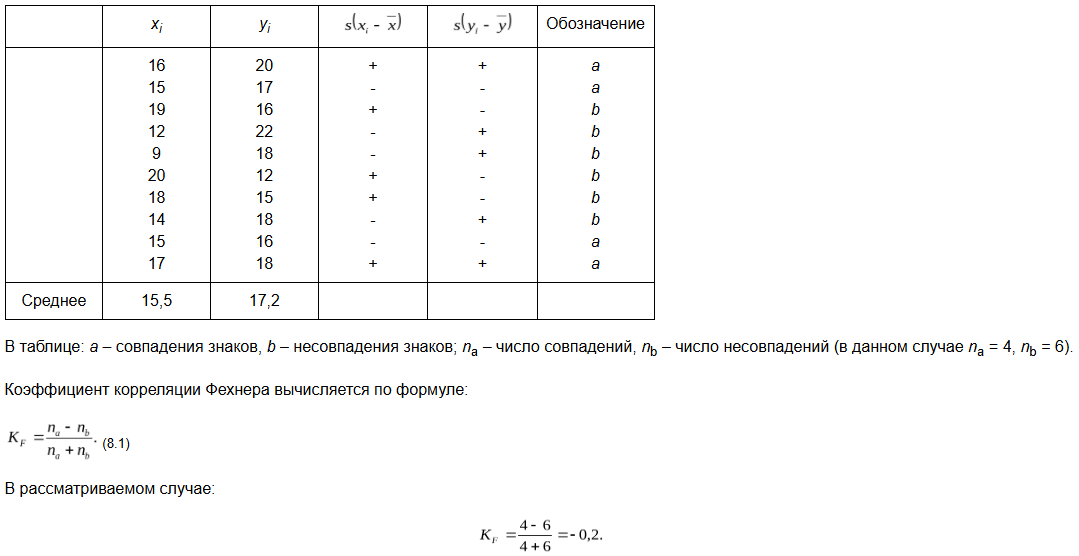

## Кореляція Пірсона
Застосовуємо на continuos даних.

Коефіцієнт кореляції Пірсона, або r Пірсона, кількісно вимірює силу та напрямок **лінійного** зв'язку між двома неперервними змінними. Коефіцієнт Пірсона коливається від -1 до 1. Цей коефіцієнт показує, наскільки близько точки даних на діаграмі розсіювання розташовані до прямої лінії:

- 1 означає ідеальну позитивну лінійну залежність, тобто зі збільшенням однієї змінної інша також послідовно зростає.
- -1 вказує на ідеальна від'ємна лінійна залежністьде одна змінна зростає при зменшенні іншої.
- 0 припускає немає лінійної кореляціїщо означає, що змінні не мають лінійного зв'язку.

Формула:

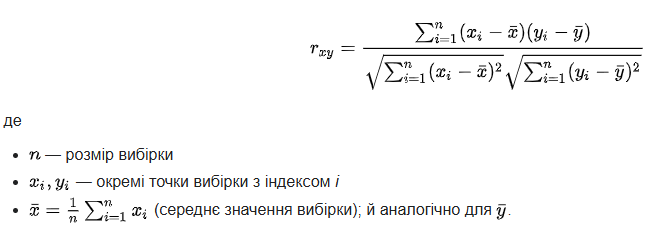

Обмеження:

- Нелінійні взаємозв'язки: вимірювання тільки кореляції Пірсона лінійні залежностітому вона може неточно відображати силу зв'язку у випадках, коли зв'язок між змінними є криволінійним або нелінійним. Наприклад, якщо змінні мають квадратичну або експоненціальну залежність, кореляція Пірсона може недооцінювати або не відображати справжній зв'язок.
- Викиди: присутність екстремальних значень можуть значно спотворювати результати кореляції Пірсона, даючи хибне уявлення про загальний зв'язок між змінними. Один викид може штучно завищити або занизити значення кореляції.
- Неперервні змінні: Кореляція Пірсона передбачає, що обидві змінні є неперервними


[Як в пандас ](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html)

[Правила обчислення і інтерпретація](https://studfile.net/preview/9290218/page:7/)

In [36]:
data[['Mileage', 'Price']].corr()

Mileage     Price
Mileage  1.000000 -0.551227
Price   -0.551227  1.000000

## Рангова кореляція Спірмена

У багатьох випадках результати спостережень подаються не у вигляді кількісних вимірювань, а у вигляді бальних оцінок (рангів).  Наприклад, студенти у групі можуть бути впорядковані по номерам за середнім балом в сесії, країни – закількістю населення, учасники конкурсу – за зайнятим місцем тощо. При цьому інколи виникає можливість упорядкувати об’єкти дослідження за двома або більше
показниками. У зв’язку з цим виникає задача дослідження кореляції цих показників.

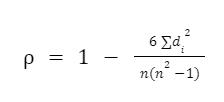

- де di - різниця рангів кожної пари
- n - кількість спостережень

Алгоритм:
- **Надання рангів**: кожному значенню змінної присвоюється ранг.
- **Обчислення різниць рангів**: для кожної пари значень обчислюється різниця рангів (di).
- **Квадрат різниць рангів**: обчислюються квадрати різниць рангів (di2).
- **Підстановка у формулу**: сума квадратів різниць рангів підставляється у формулу для обчислення коефіцієнта Спірмена.

Приклад:

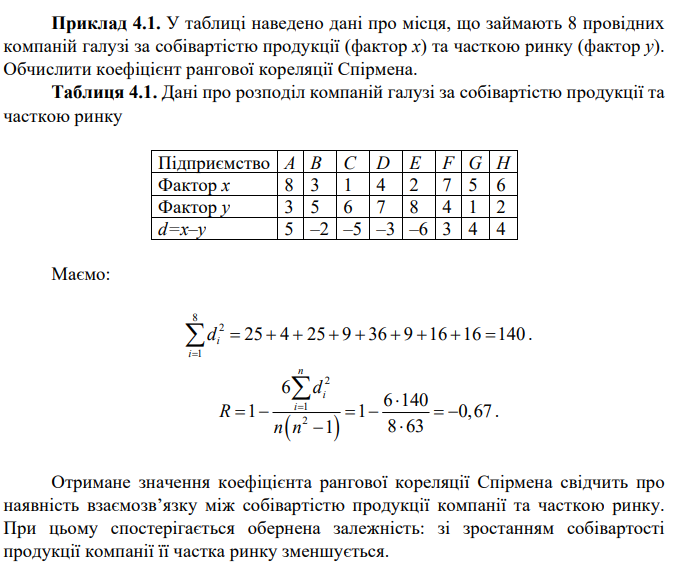


In [37]:
#для прикладу
from scipy.stats import spearmanr
 
# sample data
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
 
# calculate Spearman's correlation coefficient and p-value
corr, pval = spearmanr(x, y)
 
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: -0.9999999999999999
p-value: 1.4042654220543672e-24


In [38]:
data_sc = pd.read_csv('student_sleep_patterns.csv')
data_sc.head(5)

Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4                2                 37             10   
1          1.9                5                 74              2   
2          3.9                5                 53              5   
3          2.8                4                 55              9   
4          2.7                0                 85              3   

   Weekday_Sleep_Start  Weekend_Sleep_Start  Weekday_Sleep_End  \
0                14.16                 4.05               7.41   
1                 8.73                 7.10               8.21   
2                20.00                20.47               6.88   
3                19.82                 4.08               6.69   
4                20.98                 6.12               8.98   

   Weekend_Sleep_End  
0               7.06  
1              10.21  
2              10.92  
3               9.42  
4               9.01

In [39]:
data_sc['Sleep_Quality'].unique()

array([10,  2,  5,  9,  3,  6,  4,  7,  8,  1], dtype=int64)

In [41]:
tt = data_sc.groupby(['Gender'])['Sleep_Quality'].value_counts().sort_index().reset_index(inplace = False)
display(tt)
male = list(tt[tt['Gender'] == 'Male']['count'])
female = list(tt[tt['Gender'] == 'Female']['count'])

print(male, female)

Gender  Sleep_Quality  count
0   Female              1     19
1   Female              2     12
2   Female              3     16
3   Female              4     14
4   Female              5     16
5   Female              6     25
6   Female              7     15
7   Female              8     17
8   Female              9     16
9   Female             10     16
10    Male              1     30
11    Male              2     19
12    Male              3     21
13    Male              4     17
14    Male              5     15
15    Male              6     16
16    Male              7     18
17    Male              8     14
18    Male              9     19
19    Male             10     17
20   Other              1     17
21   Other              2     15
22   Other              3     17
23   Other              4     15
24   Other              5     10
25   Other              6     16
26   Other              7     12
27   Other              8      9
28   Other              9     20
29   Other             10     17

[30, 19, 21, 17, 15, 16, 18, 14, 19, 17] [19, 12, 16, 14, 16, 25, 15, 17, 16, 16]


In [42]:
corr, pval = spearmanr(male, female)
 
# print the result
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

Spearman's correlation coefficient: -0.16986508190870303
p-value: 0.6389574103599931


[Стаття про p-value](https://uk.wikipedia.org/wiki/P-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%BD%D1%8F)

## Тест на незалежність Chi-квадрат

- [Стаття на medium](https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6)

- [Презентація на сайті університету Каразіна](https://psychology.karazin.ua/dist2020/materialy/OlefirXiSquare.pdf)

- [Практична робота застосування тесту хі-квадрат на тому ж сайті](https://psychology.karazin.ua/dist2020/materialy/OlefirEffectXiSquareIndependence.pdf)

Уявіть ситуацію, що був преведно опитування серед учнів восьмого класу про готовність користуватися послугами з охорони психічного здоров’я в разі, якщо у них виникли емоційні або інші проблеми з психічним здоров’ям. Розподіл частот:

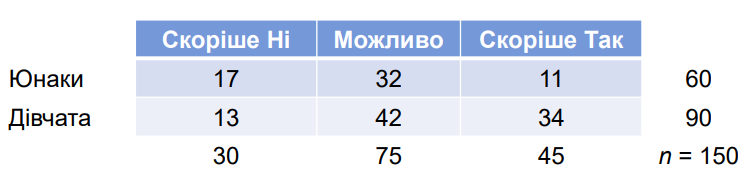

Етапи тестування:
- Формулюємо гіпотези і вибираємо рівень значимості. Згідно нульовій гіпотезі, дві змінні є незалежними. Наприклад:
    - H0 : У популяції в цілому немає взаємозв’язку між статтю і бажанням користуватися послугами з охорони психічного здоров’я.
    - H1: В загальній популяції існує стійкий, передбачуваний зв’язок між статтю і бажанням користуватися послугами з охорони психічного здоров’я.
- Визначаємо ступені свободи і знаходимо критичну область. Для тесту хі-квадрат на незалежність.



Для df = 2 і альфа = 0,05 таблиця критичних значень для хі-квадрат вказує, що критичне значення хі-квадрат дорівнює 5,99.
Частина таблиці:

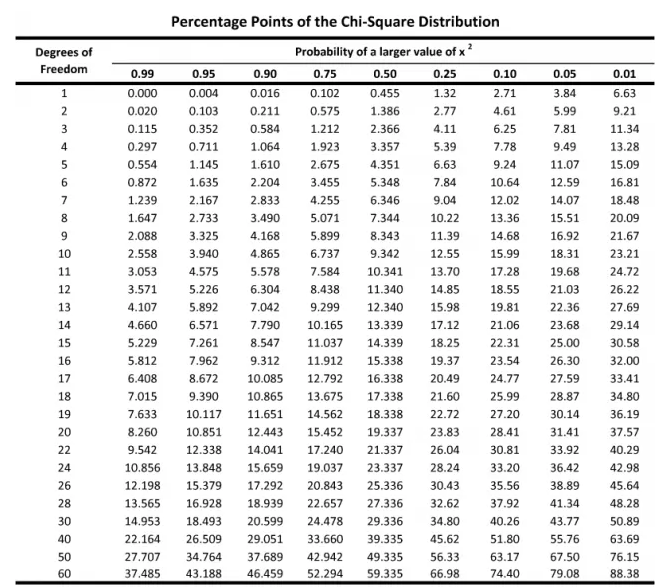

- Визначаємо очікувані частоти та обчислюємо статистику хі-квадрат. Очікувані частоти створюють ідеальний розподіл частот, який би відповідав нульовій гіпотезі: тобто пропорції відповідей серед юнаків дорівнювали б пропорції відповідей серед дівчат.

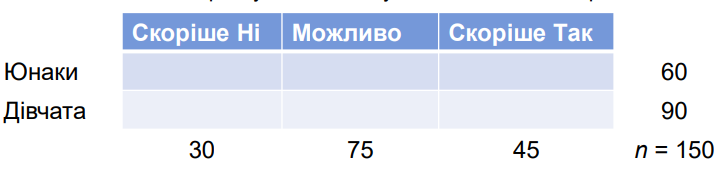 

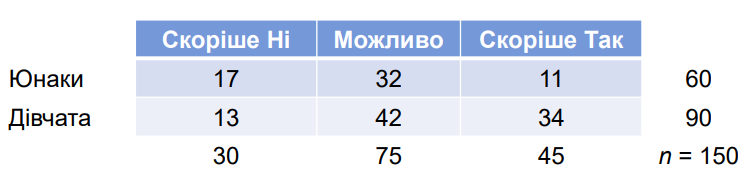

- Ці підсумки показують, що 30 з 150 учнів повідомили, що вони, ймовірно, не будуть користуватися послугами з охорони психічного здоров’я.
    - Ця частка відповідає **30/150** або **20%** від загальної вибірки.
    - Точно так же **75/150 = 50%** повідомили, що можуть користуватися послугами з охорони психічного здоров’я.
    - Нарешті, **45/150 = 30%** повідомили, що, ймовірно, будуть користуватися послугами.

**Нульова гіпотеза стверджує, що ці пропорції однакові для юнаків і дівчат.**

Тому ми просто застосовуємо частки до кожної групи, щоб отримати **очікувані** частоти. Для групи з **60 юнаків** (верхній ряд) отримуємо:

- 20% з 60 = 12 юнаків, які, ймовірно, не будуть звертатися за послугами
- 50% з 60 = 30 юнаків, які можуть звернутися за послугами
- 30% з 60 = 18 юнаків, які, ймовірно, будуть шукати послуги

Для групи з **90 дівчат(нижній ряд)** ми очікуємо:

- 20% з 90 = 18 дівчат, які, ймовірно, не будуть звертатися за послугами
- 50% з 90 = 45 дівчат, які можуть звертатися за послугами
- 30% з 90 = 27 дівчат, які, ймовірно, будуть звертатися за послугами

**Оригінальні** частоти:

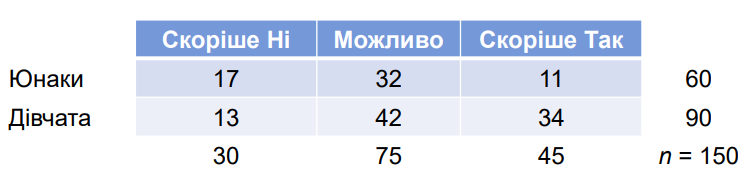

**Очікуваними** частотами:

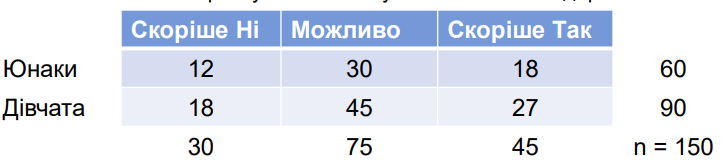


Далі використовується формула для розрахунку:

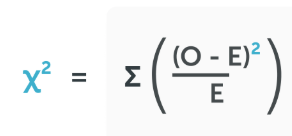

Рахуємо:

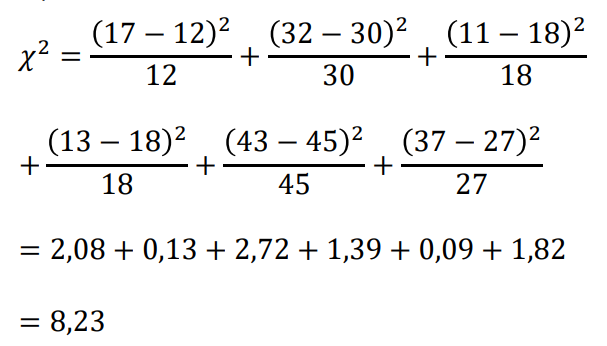

In [43]:
#порівнюємо

critical = 5.99
calculated = 8.23

if critical < calculated:
    print('Reject H0')
else:
    print('Accept H0')


Reject H0


In [44]:
#example
from scipy.stats import chi2_contingency

#cross_tab
display(pd.crosstab(data['Fuel_Type'], data['Transmission']))

Transmission  Automatic  Manual  Semi-Automatic
Fuel_Type                                      
Diesel              827     846             839
Electric            881     893             851
Hybrid              819     817             817
Petrol              790     816             804

In [45]:
#chi-square
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Fuel_Type'], data['Transmission']))
print(
    'Chi-Sq Stat.:', chi2,
    'P-value:', p,
    'Degree of Freedom:', dof,
)

Chi-Sq Stat.: 1.039463528427279 P-value: 0.9840719633423838 Degree of Freedom: 6


In [46]:
data

Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356      2            3  12092  
2      231440      4            2  11171  
3      160971      2            1  11780  
4      286618      3            3   2867  
...       ...    ...          ...    ...  
9995     5794      2            4   8884  
9996   168000      2            1   6240  
9997    86664      5            1   9866  
9998   225772      4            1   4084  
9999   157882      3            3   3342  

[10000 rows x 10 columns]

In [47]:
display(pd.crosstab(data['Brand'], data['Fuel_Type']))

Fuel_Type   Diesel  Electric  Hybrid  Petrol
Brand                                       
Audi           248       262     280     248
BMW            245       279     217     258
Chevrolet      260       250     257     236
Ford           264       278     258     248
Honda          248       265     256     240
Hyundai        250       255     253     237
Kia            260       244     242     230
Mercedes       251       249     216     226
Toyota         246       268     224     232
Volkswagen     240       275     250     255

In [48]:
#chi-square
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Brand'], data['Fuel_Type']))
print(
    'Chi-Sq Stat.:', chi2,
    'P-value:', p,
    'Degree of Freedom:', dof,
)

Chi-Sq Stat.: 18.474770457797174 P-value: 0.8883399086462952 Degree of Freedom: 27


In [ ]:
#df.select_dtypes(include=['float64', 'int64'])

In [ ]:
#df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels = ['Teen', 'Young Adult', 'Adult', 'Senior'])

In [ ]:
#tt.groupby(pd.cut(df['age'], l_var_r))[['']].sum()